In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
prima_df = pd.read_csv("diabetes.csv")

In [4]:
prima_df.columns = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']

In [5]:
prima_df.head()

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
X=prima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=prima_df['outcome']

In [7]:
sc=StandardScaler()
sc.fit_transform(X)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [15]:
abcl_dt = AdaBoostClassifier(n_estimators=50,random_state=2)

In [23]:
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [26]:
models = []
models.append(('Ada_Boosted_DT',abcl_dt))
models.append(('Gradient_Boosted_DT',gbcl))

Ada_Boosted_DT: 0.361396 (0.001694)
Gradient_Boosted_DT: 0.375719 (0.002027)


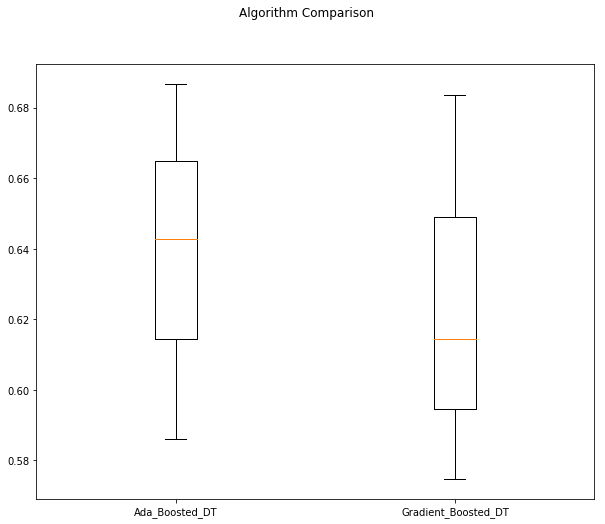

In [27]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=3,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, 
                                                 scoring='recall')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(1-cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(10,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
#Ada Boosted DT is the best for less Bias Error 

In [ ]:
#Age -> likes gardening->likes playing video games ->likes hats example

In [34]:
l1 = np.array([13,14,15,25,35,49,68,71,73])

In [37]:
l1.mean()

40.333333333333336

In [38]:
#SSE #no max depth
(13-40.3)**2 + (14-40.3)**2 + (15-40.3)**2 + (25-40.3)**2 + (35-40.3)**2 + (49-40.3)**2 +(68-40.3)**2 + (71-40.3)**2 + (73-40.3)**2

5194.009999999999

In [40]:
(13 + 14 + 15+ 35)/4

19.25

In [42]:
(13-19.25)**2 + (14-19.25)**2 + (15-19.25)**2 + (35-19.25)**2 

332.75

In [43]:
(49 + 68 + 71 + 73 + 25)/5

57.2

In [44]:
(49-57.2)**2 +(68-57.2)**2 + (71-57.2)**2 + (73-57.2)**2 + (25-57.2)**2

1660.8

In [45]:
1660.8 + 332.75 #max depth 1

1993.55

In [46]:
(49 +71+73)/3

64.33333333333333

In [47]:
(49-64.3)**2 + (71-64.3)**2 + (73-64.3)**2 

354.67

In [48]:
(25 +68)/2

46.5

In [49]:
(25-46.5)**2 + (68 - 46.5)**2

924.5

In [50]:
924.5 + 354.67 + 0.5 

1279.17

In [51]:
(14-14.5)**2 + (15-14.5)**2

0.5

In [54]:
(13 + 35)/2

24.0

In [55]:
(13-24)**2 + (35-24)**2

242

In [56]:
0.5 + 242 + 924.5 + 354.67 #level of depth 2 SSE

1521.67

In [53]:
1279.17 + 332.75  #likes gardening true + max depth at 2 SSE

1611.92

In [60]:
-6.25 -5.25 -4.25 -32.2+15.75+10.8

-21.400000000000002

In [61]:
(-21.4)/6

-3.5666666666666664

In [62]:
(-8.2 + 13.8 +15.8)/3

7.133333333333334

In [ ]:
(-6.25 +3.56)**2 + (-5.25+)

In [66]:
(-2.68-1.68-0.68+19.32)/4

3.5700000000000003

In [67]:
(-28.63 -15.33+14.37+6.67+8.67)/5

-2.8500000000000005

In [68]:
15.68 + 3.57

19.25